In [4]:
%load_ext autoreload

import numpy as np
import pickle
import cv2
import glob

car_images = glob.glob('../vehicles/**/*.png')
noncar_images = glob.glob('../non-vehicles/**/*.png')
print('Number of car images', len(car_images))
print('Number of non-car images', len(noncar_images))

Number of car images 8792
Number of non-car images 8968


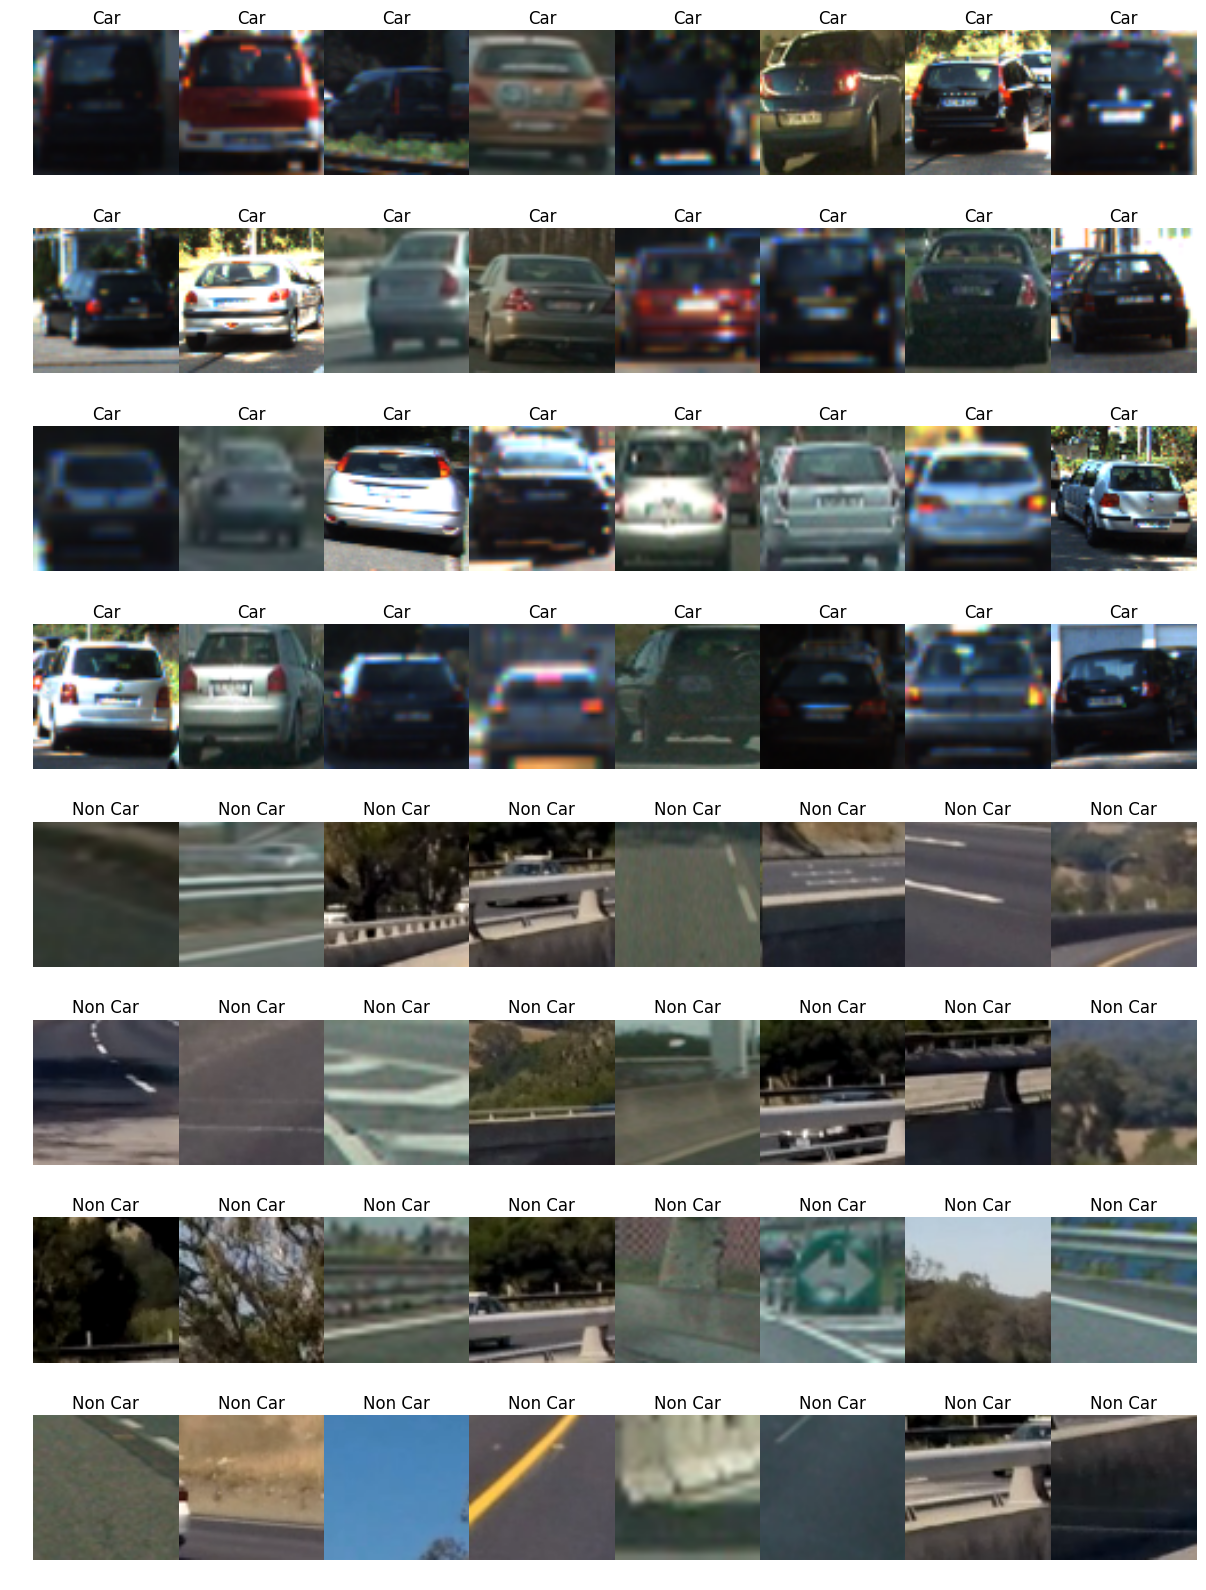

In [50]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog

%matplotlib inline

fig, axs = plt.subplots(8, 8, figsize=(15, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(32):
    img_path = car_images[np.random.randint(0,len(car_images))]
    img = mpimg.imread(img_path)     
    axs[i].imshow(img)
    axs[i].set_title('Car')
    axs[i].axis('off')
for i in range(32, 64):
    img_path = noncar_images[np.random.randint(0,len(noncar_images))]    
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].set_title('Non Car')
    axs[i].axis('off')

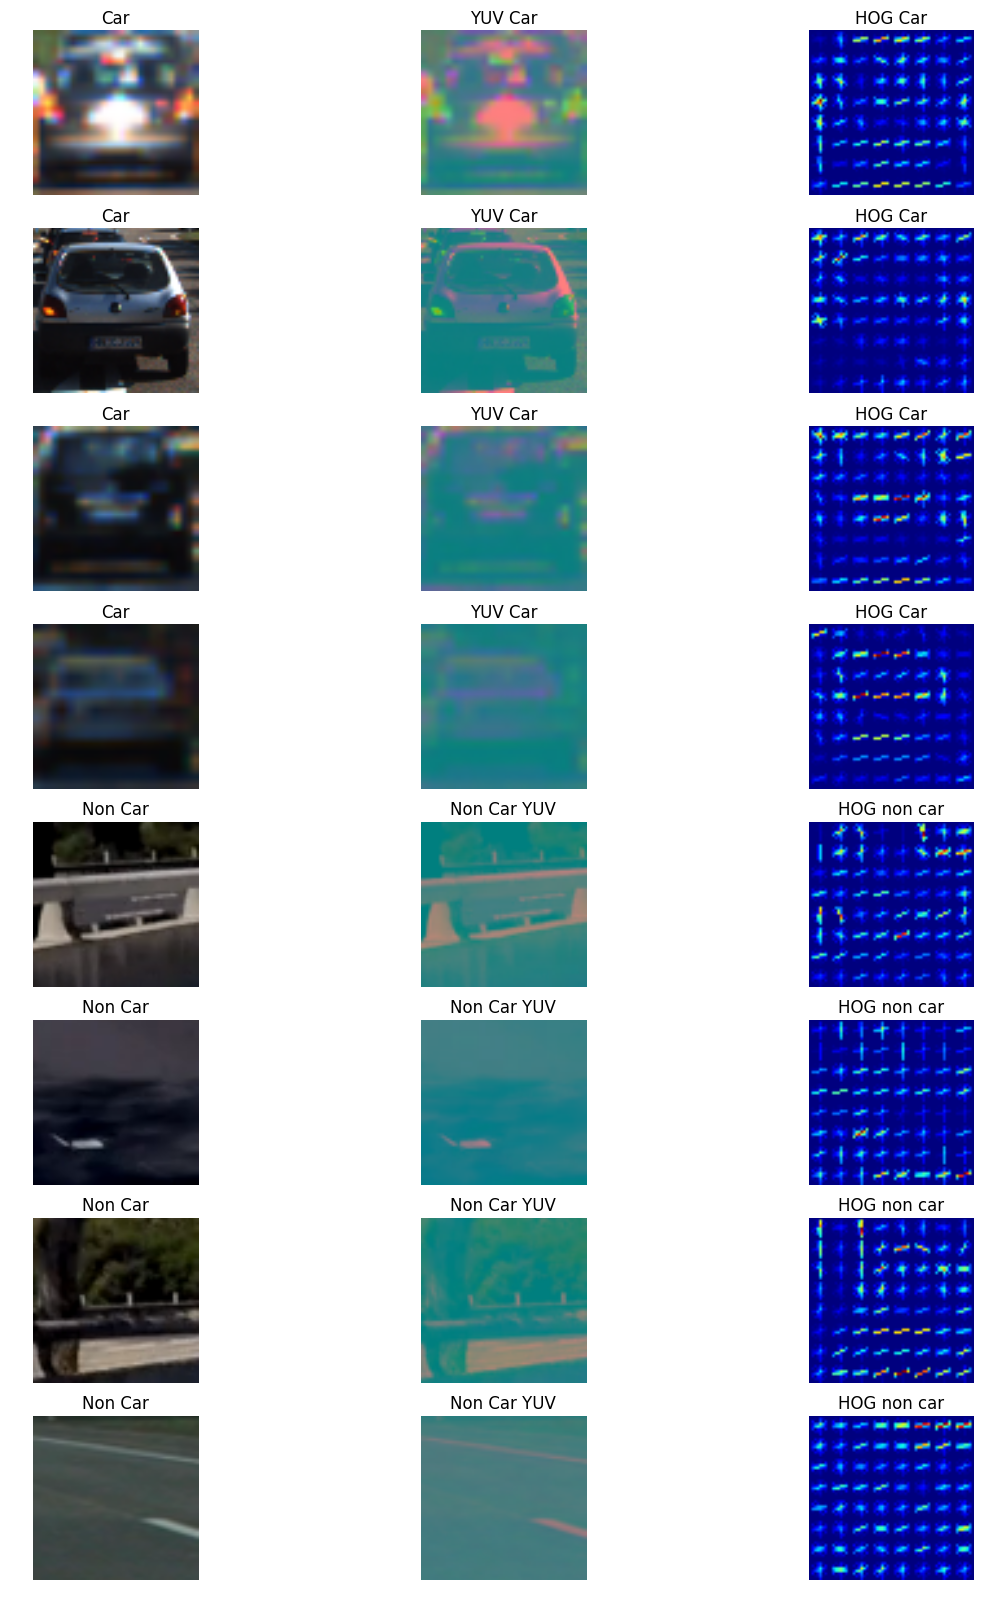

In [147]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog

%matplotlib inline

fig, axs = plt.subplots(8, 3, figsize=(15, 20))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(4):
    img_path = car_images[np.random.randint(0,len(car_images))]
    
    img = mpimg.imread(img_path)
    yuv_img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    features, hog_image = hog(yuv_img[:,:, 2], orientations=11, pixels_per_cell=(8, 8), cells_per_block=(3, 3), visualise=True, feature_vector=True)
        
    axs[3*i].imshow(img)
    axs[3*i].set_title('Car')
    axs[3*i].axis('off')
    axs[3*i+1].imshow(yuv_img)
    axs[3*i+1].set_title('YUV Car')
    axs[3*i+1].axis('off')
    axs[3*i+2].imshow(hog_image)
    axs[3*i+2].set_title('HOG Car')
    axs[3*i+2].axis('off')
    
for i in range(4):
    img_path = noncar_images[np.random.randint(0,len(noncar_images))]
    
    img = mpimg.imread(img_path)
    yuv_img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    features, hog_image = hog(yuv_img[:,:, 2], orientations=11, pixels_per_cell=(8, 8), cells_per_block=(3, 3), visualise=True, feature_vector=True)
        
    axs[3*i +12].imshow(img)
    axs[3*i+12].set_title('Non Car')
    axs[3*i+12].axis('off')
    axs[3*i+13].imshow(yuv_img)
    axs[3*i+13].set_title('Non Car YUV')
    axs[3*i+13].axis('off')
    axs[3*i+14].imshow(hog_image)
    axs[3*i+14].set_title('HOG non car')
    axs[3*i+14].axis('off')

In [14]:
%autoreload

from feature_search import get_best_parameters
from image_features import ImageFeatures
from vehicle_classifier import VehicleClassifier

best_params, best_classifier, best_score = get_best_parameters()
print("Best parameters are: \
      \n\tColor Space =  %s, \
      \n\tbin_size = %s, \
      \n\thist_bins = %d, \
      \n\thist_bin_range = (0, %d), \
      \n\thog_orient = %d, \
      \n\thog_pix_per_cell = %d, \
      \n\thog_pix_per_block = %d\n" % (best_params['cspace'], best_params['bin_size'], best_params['hist_bins'], best_params['hist_bin_range'], best_params['hog_orient'], best_params['hog_pix_per_cell'], best_params['hog_cell_per_block']))

featurizer = ImageFeatures(color_space=best_params['cspace'], 
                 bin_size=best_params['bin_size'], 
                 hist_bins=best_params['hist_bins'], 
                 hist_bin_range=(0,best_params['hist_bin_range']), 
                 hog_channel=best_params['hog_channel'],
                 hog_orient=best_params['hog_orient'], 
                 hog_pix_per_cell=best_params['hog_pix_per_cell'], 
                 hog_cell_per_block=best_params['hog_cell_per_block'])

car_features = featurizer.featurize(car_images)
noncar_features = featurizer.featurize(noncar_images)
classifier = VehicleClassifier(car_features, noncar_features)
score = classifier.fit()

print('Classifier score:', score)

Best parameters are:       
	Color Space =  LUV,       
	bin_size = (32, 32),       
	hist_bins = 32,       
	hist_bin_range = (0, 32),       
	hog_orient = 11,       
	hog_pix_per_cell = 8,       
	hog_pix_per_block = 3

Classifier score: 0.9879


In [109]:
print(best_params['hog_channel'])

3


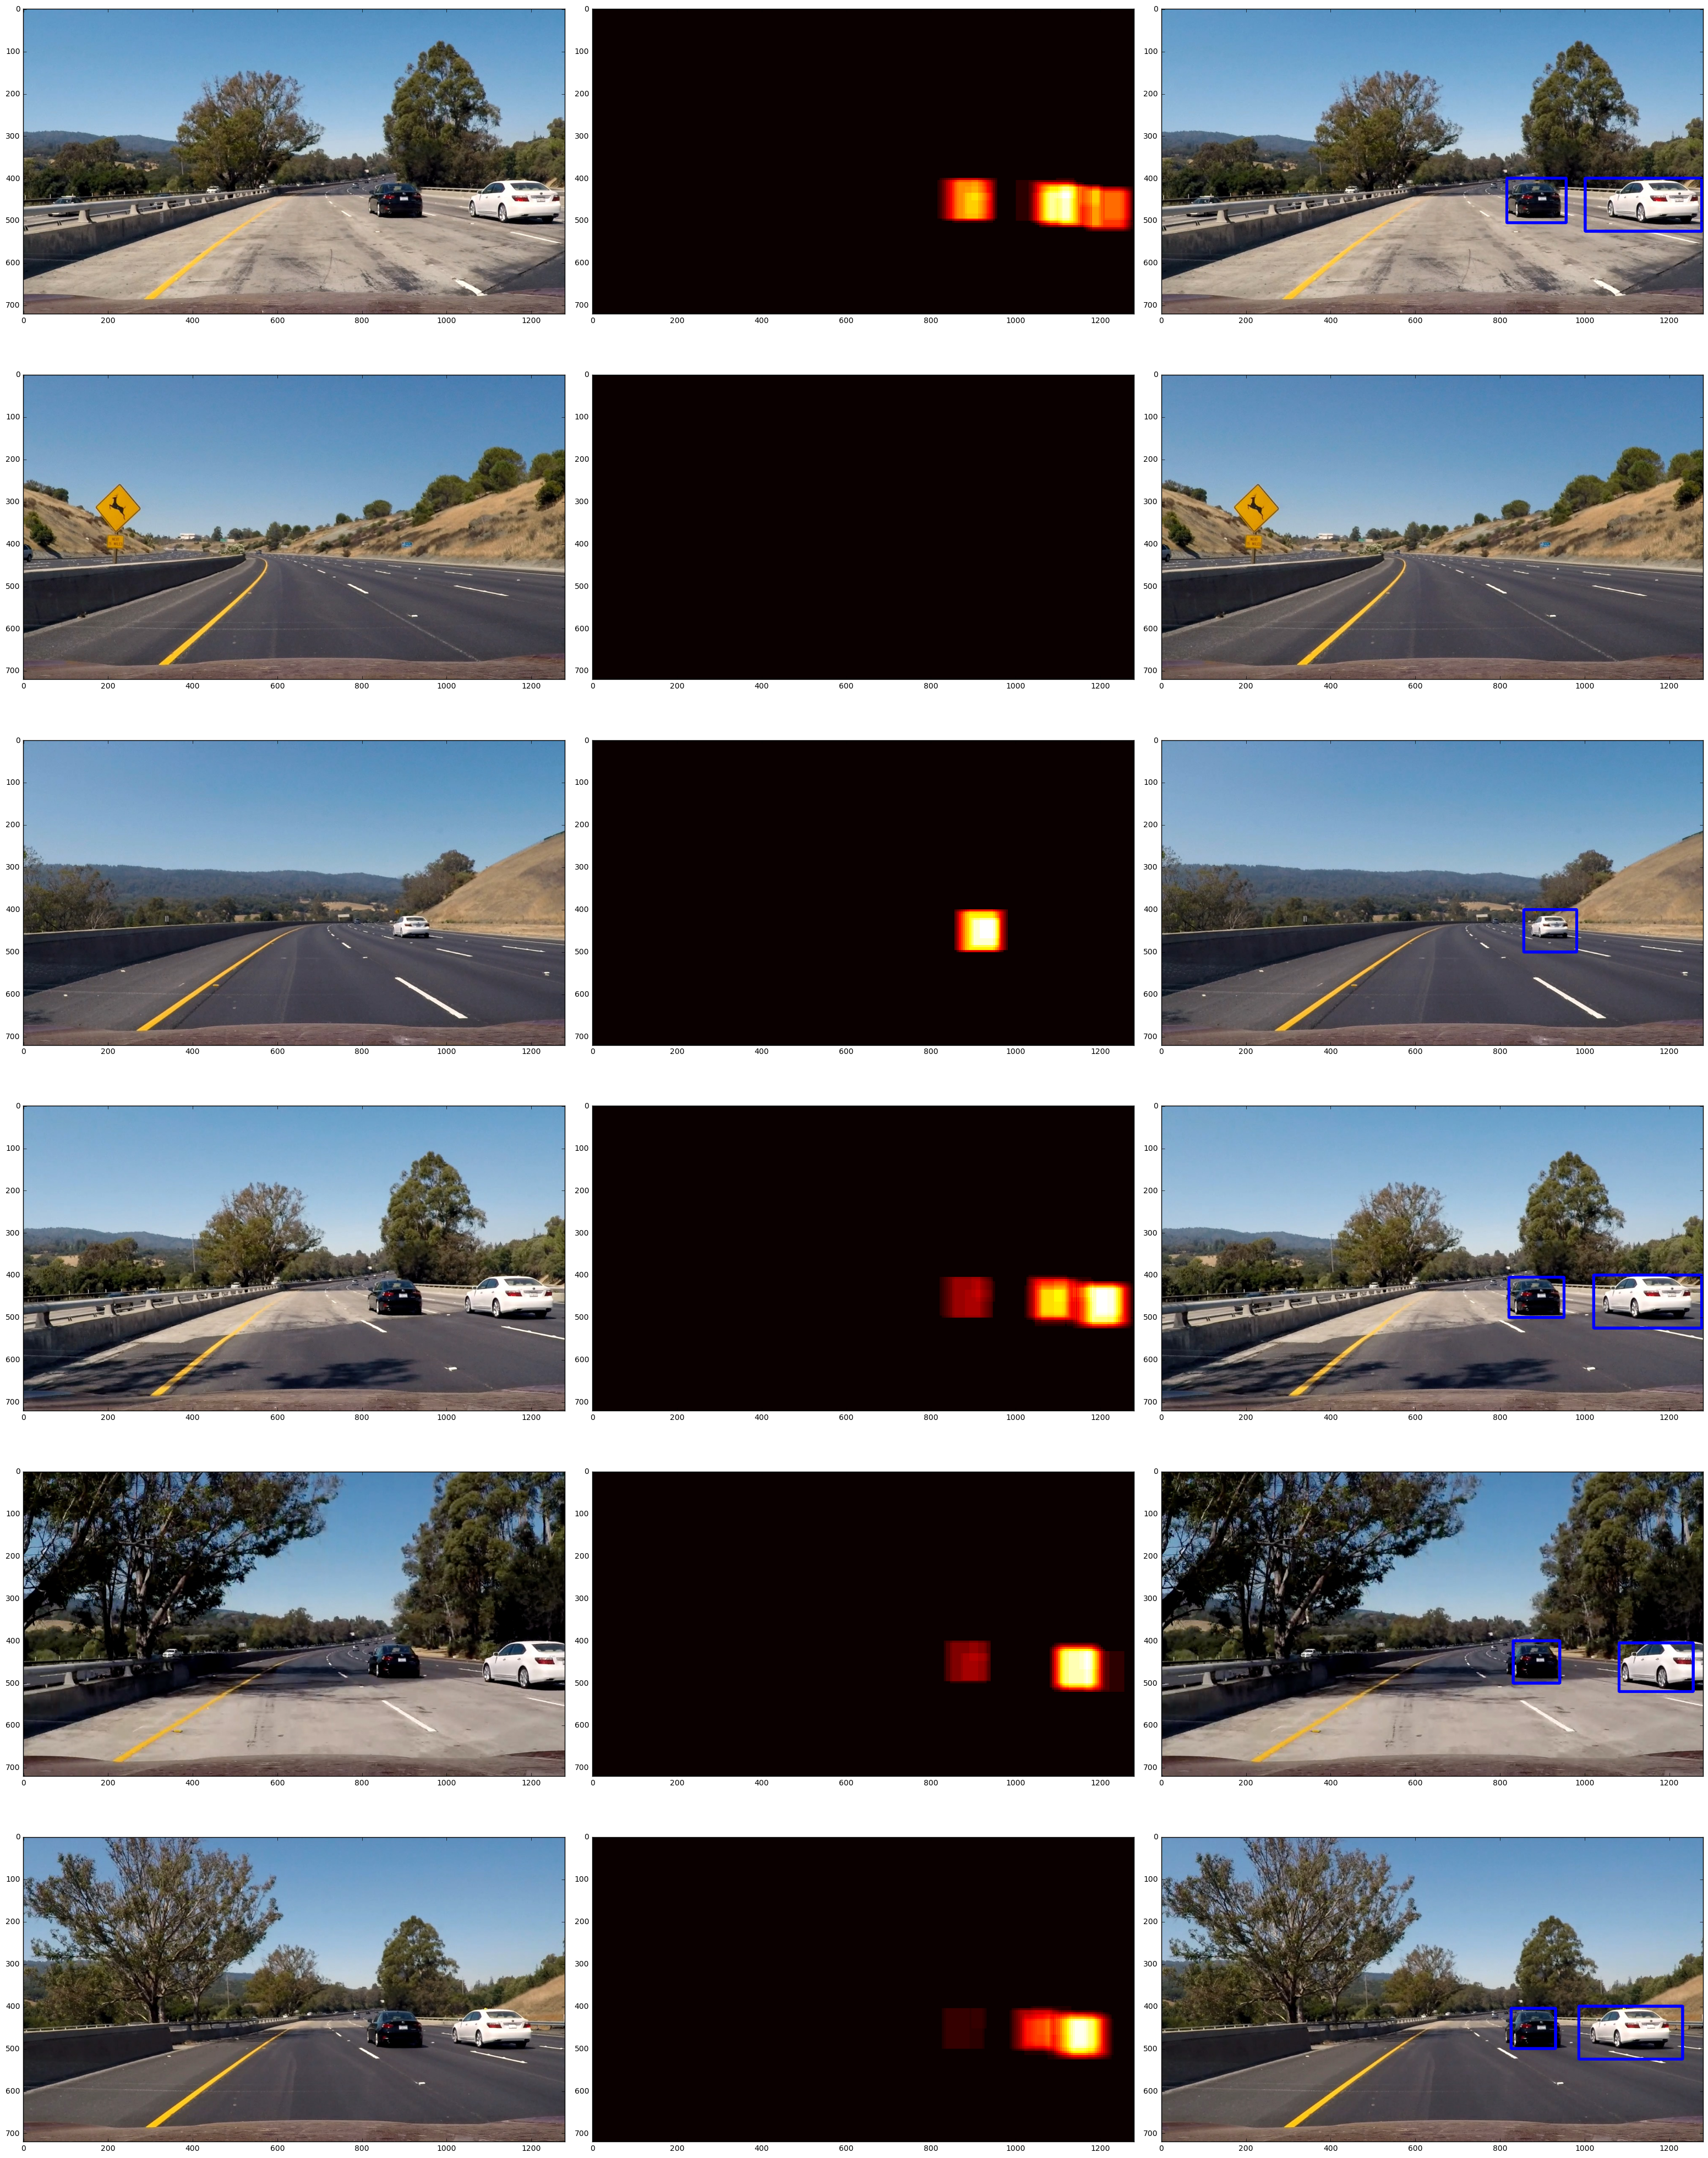

In [45]:
%autoreload

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob

from vehicle_searcher import VehicleSearcher
from sliding_window import SlidingWindow

%matplotlib inline

slider0 = SlidingWindow(featurizer, classifier, x_start_stop=[550,900], y_start_stop=[350, 450], xy_window=[20,20])
slider1 = SlidingWindow(featurizer, classifier, x_start_stop=[600,900], y_start_stop=[370, 430], xy_window=[32,32], xy_step=(5, 5))
slider2 = SlidingWindow(featurizer, classifier, x_start_stop=[520,1200], y_start_stop=[400, 470], xy_window=[48,48], xy_step=(5, 5))
slider3 = SlidingWindow(featurizer, classifier, x_start_stop=[450,None], y_start_stop=[420, 500], xy_window=[64,64], xy_step=(5, 5))
slider4 = SlidingWindow(featurizer, classifier, x_start_stop=[400,None], y_start_stop=[400, 530], xy_window=[96,96], xy_step=(5, 5))
slider5 = SlidingWindow(featurizer, classifier, x_start_stop=[350,None], y_start_stop=[430, 560], xy_window=[128,128], xy_step=(5, 5))
slider6 = SlidingWindow(featurizer, classifier, x_start_stop=[350,None], y_start_stop=[500, 690], xy_window=[192,192], xy_step=(5, 5))

searcher=VehicleSearcher([slider1, slider2, slider3, slider4, slider5, slider6])

test_images = glob.glob('../test_images/*.jpg')

fig, axs = plt.subplots(len(test_images), 3, figsize=(40, 50))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(len(test_images)):
    img_path = test_images[i]
    img = mpimg.imread(img_path)
    _, heatmap, draw_img = searcher.detect(img)

    axs[3*i].imshow(img)
    axs[3*i+1].imshow(heatmap, cmap='hot')
    axs[3*i+2].imshow(draw_img)


In [47]:
%autoreload

from video_detect import VideoCarDetection

out_file = '../test_video_out.mp4'
input_file = '../test_video.mp4'
    
video = VideoCarDetection(classifier, featurizer, input_file, out_file)
video.annotate_video()

[MoviePy] >>>> Building video ../test_video_out.mp4
[MoviePy] Writing video ../test_video_out.mp4


 97%|█████████▋| 38/39 [03:09<00:04,  4.91s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../test_video_out.mp4 



In [48]:
%autoreload

from video_detect import VideoCarDetection

out_file = '../project_video_out.mp4'
input_file = '../project_video.mp4'
    
video = VideoCarDetection(classifier, featurizer, input_file, out_file)
video.annotate_video()

[MoviePy] >>>> Building video ../project_video_out.mp4
[MoviePy] Writing video ../project_video_out.mp4


100%|█████████▉| 1260/1261 [1:39:50<00:04,  4.47s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../project_video_out.mp4 

